In [1]:
%run 00.style.ipynb

/Users/piazza/Playground/tweet-in-love


In [2]:
from sklearn.model_selection import train_test_split
import matplotlib.ticker as mtick

from tweet_in_love.settings import GlobalSettings

settings = GlobalSettings()

In [3]:
df = pd.read_csv(settings.raw_csv_path)

# Filter duplicated rows

In `01. data exploration.ipynb` we saw that some tweets have identical content.

These tweets may have been labelled with several sentiment.

I'll remove the duplicated row, and use for them the most common sentiment.

In [4]:
# count rows with identical content
dups = df.content.duplicated()
dups.sum()

173

In [5]:
# Keep most common sentiment for identical rows
df_no_dup = (
    df.groupby(["content", "sentiment"])
    .tweet_id.agg("count")
    .reset_index()
    .rename(columns={"tweet_id": "count"})
    .sort_values(by=["count", "content"], ascending=False)
    .drop_duplicates(subset="content", keep="first")
    .drop(columns=["count"])
)

In [6]:
assert (df.shape[0] - df_no_dup.shape[0]) == dups.sum(), "Error in filtering duplicates"

In [7]:
df_no_dup.shape

(39827, 2)

In [8]:
df_no_dup.head()

,content,sentiment
23636,I just received a mothers day card from my lov...,love
22164,Happy Mothers Day,love
22124,Happy Mother's Day!,love
33641,happy mother's day,love
21420,Good Morning,neutral


# Filter tag `empty`

In [9]:
df_no_empty = df_no_dup[~df_no_dup.sentiment.isin(["empty"])]
df_no_dup.shape[0], df_no_empty.shape[0]

(39827, 39004)

# Split train/test

In [10]:
train, test = train_test_split(df_no_empty, test_size=0.2)
train.shape, test.shape

((31203, 2), (7801, 2))

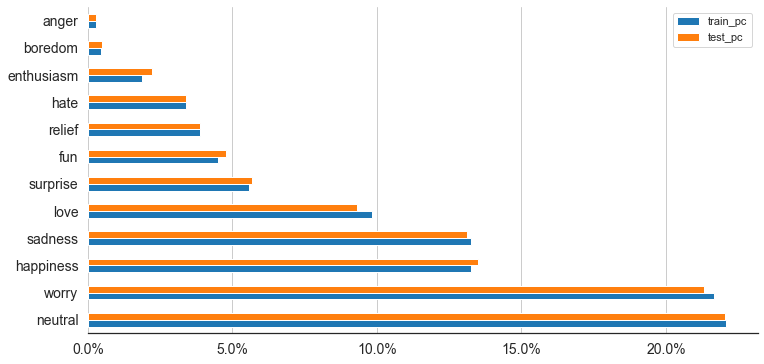

In [11]:
train_count = train.sentiment.value_counts()
test_count = test.sentiment.value_counts()
counts = pd.DataFrame(
    dict(
        train_pc=train_count / train_count.sum(),
        test_pc=test_count / test_count.sum(),
    )
)

with plot_style():
    ax = plt.gca()
    counts.plot.barh(ax=ax)
    ax.xaxis.set_major_formatter(mtick.PercentFormatter(1))
    plt.grid(axis="x")

In [12]:
# save train and test in global directory
train.to_csv(settings.train_csv_path, index=False)
test.to_csv(settings.test_csv_path, index=False)